# Cellpose Segmentation

In [1]:
from merfishing import Merfish

## Entry Point

In [2]:
merfish = Merfish('dummy_experiment/output/region_0/')

MERFISH Experiment Region
Region data located at /gale/netapp/cemba3c/merfish/example/dummy_experiment/output/region_0
Experiment dir located at /gale/netapp/cemba3c/merfish/example/dummy_experiment
Using cellpose results


## Run Cellpose

In [3]:
merfish.cell_segmentation(model_type='cyto',
                          diameter=100,
                          jobs=16,
                          padding=100,
                          verbose=False,
                          redo=False)

/gale/netapp/cemba3c/merfish/example/dummy_experiment/output/region_0 does not contain cellpose results or the results are incomplete, using watershed results from vizgen pipeline instead./gale/netapp/cemba3c/merfish/example/dummy_experiment/output/region_0 does not contain cellpose results or the results are incomplete, using watershed results from vizgen pipeline instead./gale/netapp/cemba3c/merfish/example/dummy_experiment/output/region_0 does not contain cellpose results or the results are incomplete, using watershed results from vizgen pipeline instead.


/gale/netapp/cemba3c/merfish/example/dummy_experiment/output/region_0 does not contain cellpose results or the results are incomplete, using watershed results from vizgen pipeline instead.


## Run single cellpose

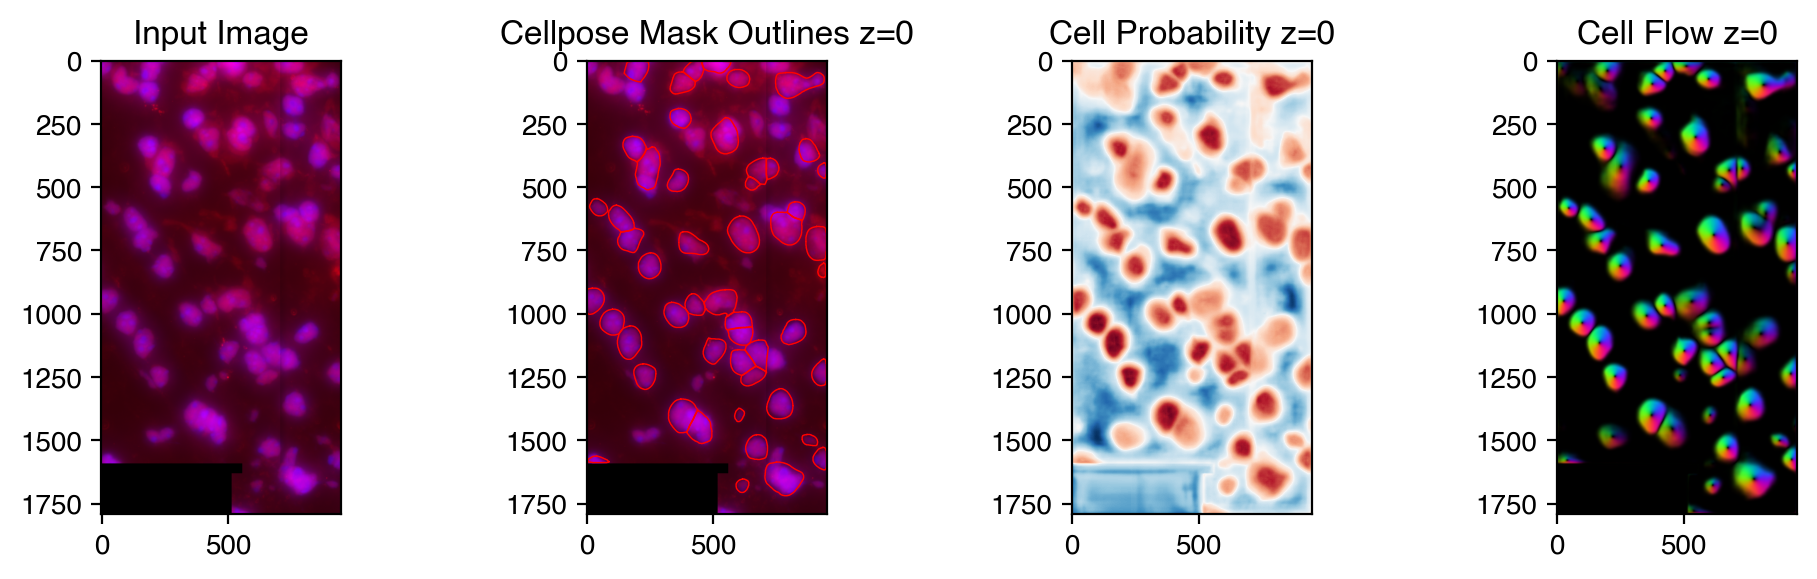

In [12]:
from merfishing.tl.cellpose import run_cellpose


image = merfish.get_rgb_image('PolyT++DAPI', fov=0, projection=None)
# PolyT++DAPI means put PolyT in R channel (0) and DAPI in B channel (2)
# the image shape is (z, y, z, channel)
feature_mask, feature_meta = run_cellpose(image=image,
                      model_type='cyto',
                      diameter=100,
                      gpu=False,
                      channels=[[0, 2]],
                      channel_axis=3,
                      z_axis=0,
                      buffer_pixel_size=15,
                      plot=True)

## Reopen Merfish Entry Point

Cellpose based segmentation will be used as default automatically

In [2]:
merfish_new = Merfish('dummy_experiment/output/region_0/')

MERFISH Experiment Region
Region data located at /gale/netapp/cemba3c/merfish/example/dummy_experiment/output/region_0
Experiment dir located at /gale/netapp/cemba3c/merfish/example/dummy_experiment
Using cellpose results


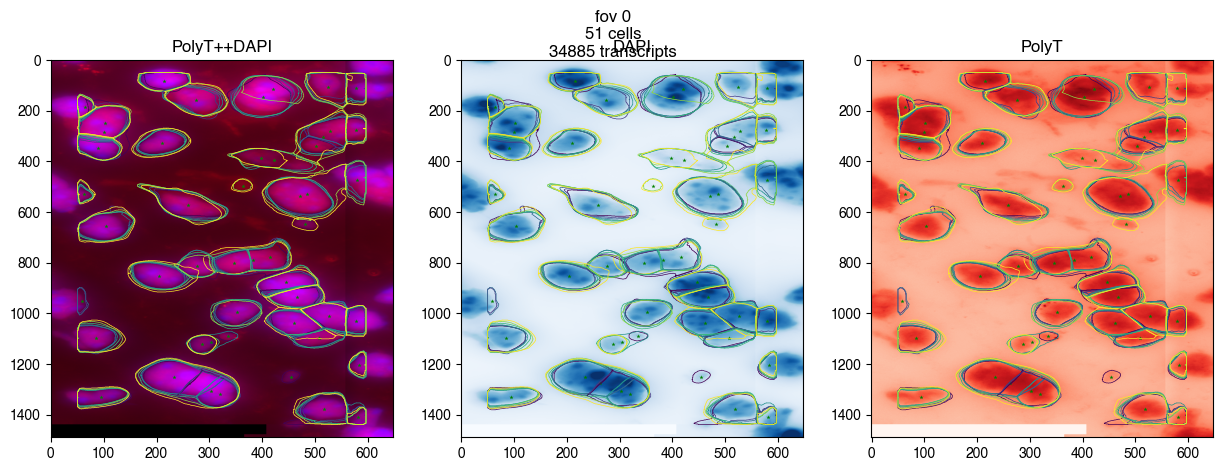

In [3]:
fig = merfish_new.plot_fov(0, dpi=100)

In [4]:
merfish_old = Merfish('dummy_experiment/output/region_0/', cell_segmentation='watershed')

MERFISH Experiment Region
Region data located at /gale/netapp/cemba3c/merfish/example/dummy_experiment/output/region_0
Experiment dir located at /gale/netapp/cemba3c/merfish/example/dummy_experiment


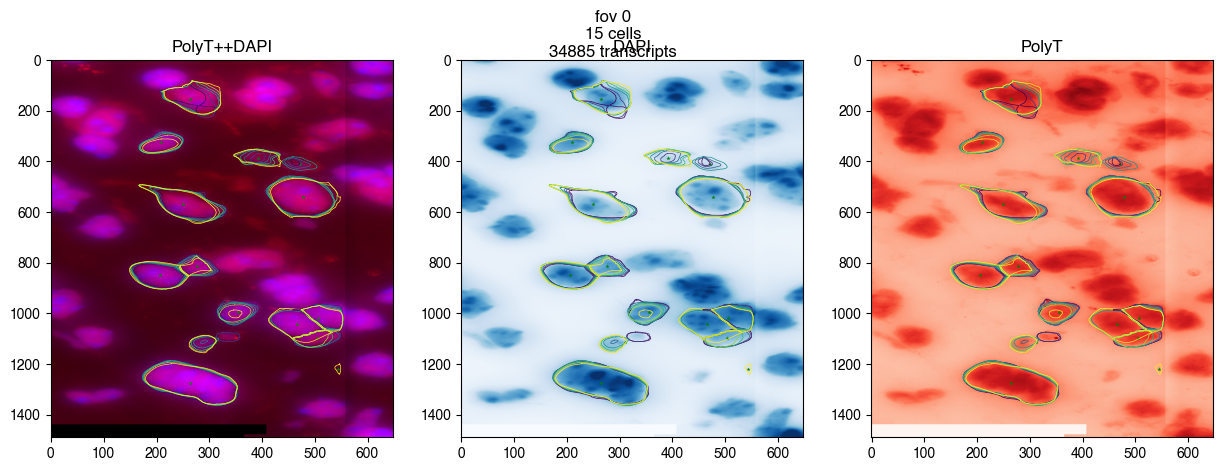

In [5]:
fig = merfish_old.plot_fov(0, dpi=100)

## Details - Cellpose2

Cell segmentation is done by the cellpose2 package with its pretrained model. Each z-plane is run separately, segmenting the PolyT channel with cyto model with the help of DAPI channel indicating nuclei. Please read the cellpose2 package for more details and fine tune the parameter if needed. You can train a custom model to achieve better segmentation results (watch the Youtube video below).

- Github: https://github.com/MouseLand/cellpose
- Documentation: https://cellpose.readthedocs.io/en/latest/
- YouTube Tutorial: https://www.youtube.com/watch?v=5qANHWoubZU


## Save TIFF file for Cellpose GUI and retrain the model

In [9]:
import tifffile

name = 'PolyT++DAPI'  # R+G+B
fov = 0  # field of view
z = 3  # single z plane

img = merfish_new.get_rgb_image(name=name, z=z, fov=fov)

tifffile.imwrite(f'{fov}-{z}.tiff', img, compression='ZSTD')